# Video Game Sales Analysis

![Video Game GIF](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzM1NmZ1bXl2dThxYTZwbThmaGFsOXprcGlobjF0MTN5YXBnOXZ2eCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/11r9VKSIAFsKgU/giphy.gif)



This notebook explores video game sales data from more than 16,500 games. The dataset incorporates a list of video games with sales greater than 100,000 copies which is generated by a scrape of vgchartz.com

In [156]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
# Read and Load the csv file
df = pd.read_csv('vgsales.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### With the table showed above the sales are in millions

## Data Cleaning

In [158]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [159]:
# This shows where the null values are in the dataset so I can remove them
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [160]:
# Checking to see how many N/A values we have
print("N/A values before cleaning:")
df.isna().sum()

N/A values before cleaning:


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

As you can see above there are 271 N/A values in the year column and 58 N/A values in the Publisher column

In [161]:
# Remove rows where either year or publisher is N/A
df_cleaned = df.dropna(subset=['Year', 'Publisher'])

In [162]:
# Should display all columns with a 0 to show no N/A values
print('N/A values after cleaning:')
df_cleaned.isna().sum()

N/A values after cleaning:


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Now we can see above the columns which displayed N/A in years and published have now been removed

## Exploratory Data Analysis

### Basic Statistics

In [163]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


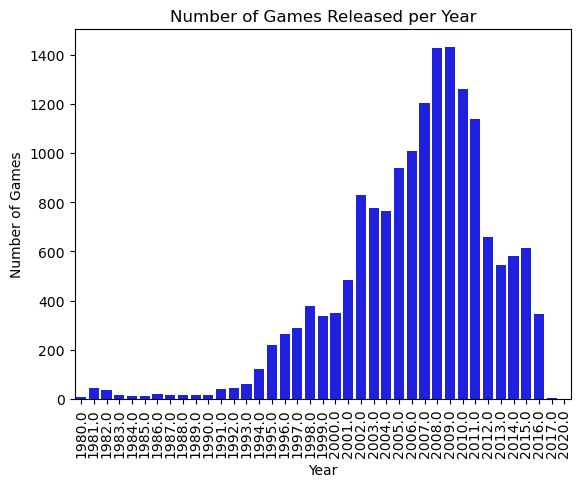

In [164]:
plt.figure()
sns.countplot(x=df['Year'], color='blue')
plt.xticks(rotation=90, fontsize=10)
plt.title("Number of Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

This graph is a count plot showing how many video games were released each year. A sharp increase in some years indicates technological advancements such as either a new console being released or market expansion. 

There were some label adjustments made, which is why **plt.xticks(rotation=90, fontsize=10)** was added to prevent overlap allowing better readability.

## Data visualisation


### Chart 1: Top 10 Games by Global Sales

This bar chart presents the top 10 best-selling video games globally, ranked by their total sales in millions. Each bar represents a game title to provide a clearer understanding of their relative success in descending order. The data reveals a significant disparity between the highest-grossing games and others in the top 10, indicating the presence of major blockbuster titles that dominate global sales. This visualization helps identify the industry's most successful games, which can be useful for understanding market trends and consumer preferences. As you can see from the graph below the best game global according to global sales was Wii Sports. Another reason why this visualisation is important is because it helps game developers and publishers identify the key factors to high sales. 

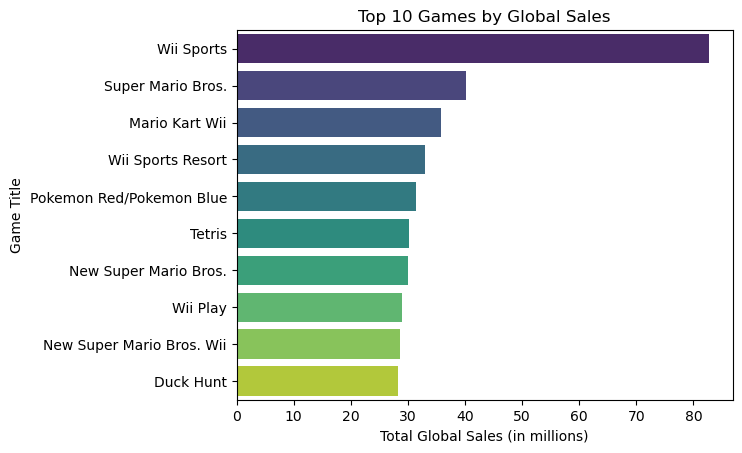

In [176]:
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure()
sns.barplot(x=top_games['Global_Sales'], y=top_games['Name'], palette='viridis')
plt.title("Top 10 Games by Global Sales")
plt.xlabel("Total Global Sales (in millions)")
plt.ylabel("Game Title")
plt.show()

### Chart 2: The Yearly Trend of Game Releases

This histogram showcases the distribution of video game releases over time. Peaks in certain years indicate industry booms, where more games were published. By analyzing this trend, we can infer periods of increased game development activity, which may correlate with advancements in technology, gaming console releases, or economic factors influencing the industry.

However, there are things to consider with this graph as it only shows the sales trends and not specific details about the specific games, genres or platforms. Using this type of graph helps to gain valuable insights into the historical performance of the video game industry.


C:\Users\msb_0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


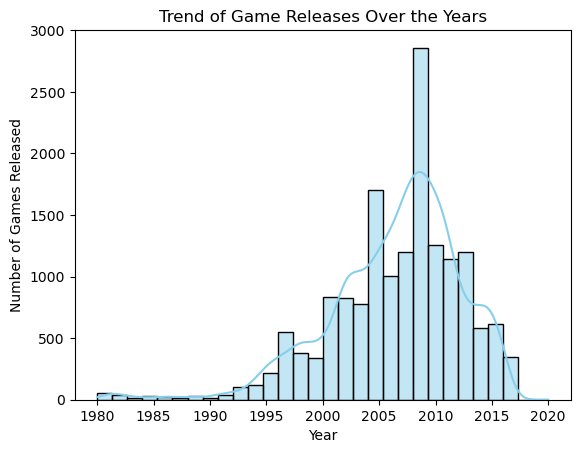

In [177]:
plt.figure()
sns.histplot(df['Year'], bins=30, kde=True, color='skyblue') 
plt.title("Trend of Game Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.show()

As you can see from the piece of code used to generate this histogram, it has been futher enhanced with a Kernel Density Estimation (KDE) curve, helping to visualise the overall trends more clear and smoothly.

#### Key Observations:
- Initially, the number of games released is relatively low in the early years reflecting the initial stages of development for video gaming.
- Then there begins to be a significant rise in game releases during the mid to late 2000s. This aligns with the rise of mainstream gaming consoles being introduced such as Xbox 360.
- From the histogram after reaching the peak the number of games appears to decline until the 2010s.
   


### Chart 3: Genre Popularity by Sales

This horizontal bar chart highlights the total sales per genre, showcasing which game types have performed best in the market. The visualization provides insights into consumer preferences, helping developers and investors focus on genres with strong sales potential.

The graph also highlights the total global sales of video games categorized by genre. The data shows that some genres, such as action and sports, dominate the market, generating significantly higher revenue compared to others. This indicates strong consumer demand for these types of games. Genres with lower sales figures might represent niche markets with dedicated player bases. Understanding which genres perform best can help developers and publishers make informed decisions about future game production and market strategies.


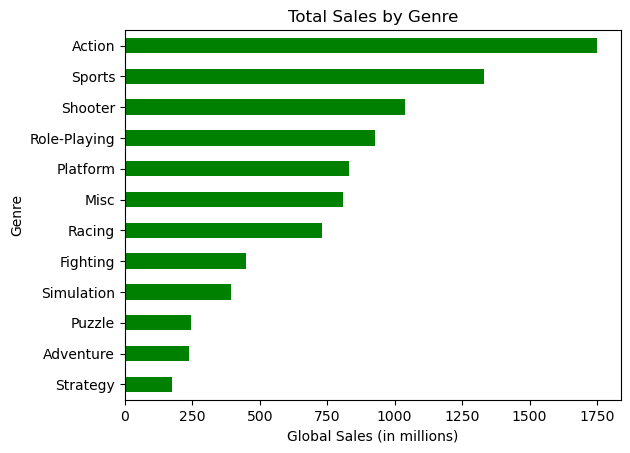

In [178]:
plt.figure()
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True)
genre_sales.plot(kind='barh', color='green')
plt.title("Total Sales by Genre")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Genre")
plt.show()

From this graph, the action genre has the most global sales indicating it is the most popular genre of game from dataset meanwhile strategy games are the most least common genre selection of games according to global sales.

### Chart 4: Top 5 PS4 Games in EU vs NA sales

This bar chart compares the top 5 best-selling PlayStation 4 (PS4) games in Europe and North America, highlighting regional differences in sales. Each game title is represented by two bars, the red bar is for European sales and the blue bar for North American which is shown with a legend on the graph to show a clear comparison. 

From the visualisation, we observe that some PS4 games perform significantly better in one region than the other. For example, certain games may have a strong European market presence but relatively lower sales in North America. Conversely, some games are more popular in North America than in Europe. This analysis helps identify regional consumer preferences, market trends, and potential business strategies for publishers aiming to maximise their reach in different parts of the world. The differences in sales can be attributed to factors such as marketing strategies, gaming culture, and exclusive content availability in each region

As observed from the bar graph, you can see the most popular PS4 game in Europe was FIFA 16 and the most popular PS4 game in North America was Call of Duty: Black Ops 3.

<Figure size 640x480 with 0 Axes>

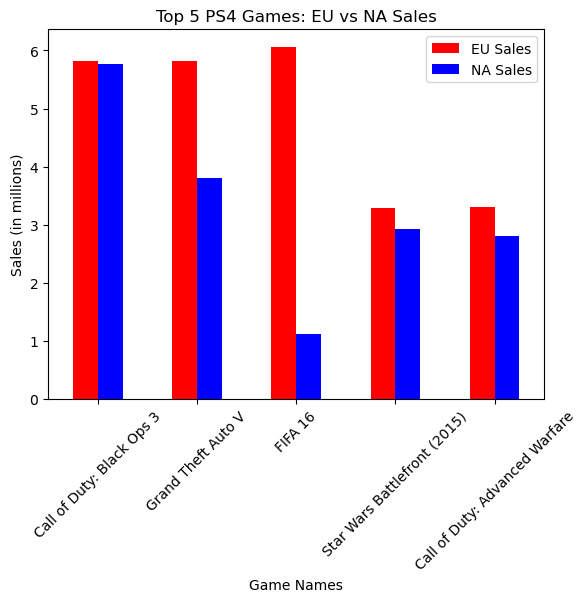

In [179]:
top_ps4_games = df[df['Platform'] == 'PS4'][['Name', 'EU_Sales', 'NA_Sales']].head(5)
plt.figure()
top_ps4_games.plot(kind='bar', x='Name', y=['EU_Sales', 'NA_Sales'], color=['red', 'blue'])
plt.title("Top 5 PS4 Games: EU vs NA Sales")
plt.xlabel("Game Names")
plt.ylabel("Sales (in millions)")
plt.legend(["EU Sales", "NA Sales"])
plt.xticks(rotation=45)
plt.show()

### Chart 5: Analysis of Video Game Sales: 2000-2010

In [180]:
yearly_sales = sales_2000_2010.groupby('Year')['Global_Sales'].sum()
yearly_sales

Year
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
Name: Global_Sales, dtype: float64

C:\Users\msb_0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msb_0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


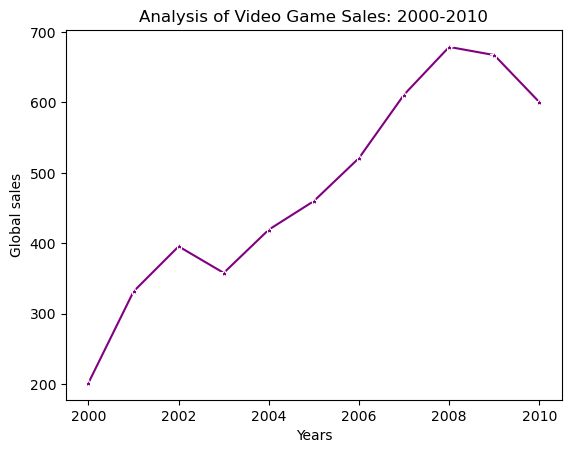

In [181]:
df_years = df[(df['Year'] >= 2000) & (df['Year'] <= 2010)]
sales_by_year = df_years.groupby('Year')['Global_Sales'].sum()                              
plt.figure()
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='*', color='purple')
plt.title('Analysis of Video Game Sales: 2000-2010')
plt.xlabel('Years')
plt.ylabel('Global sales')
plt.show()

The line chart above shows the total global sales of video games for each year from 2000 to 2010. The sales data is aggregated by year to provide a clearer view of the overall market trend during this period.

### Key Observations:
1. **Steady Growth**: The total global sales of video games increased steadily from 2000 to 2008. This period marked the rise of popular gaming consoles like the PlayStation 2, Xbox, and Nintendo Wii, which helped drive the market forward.
   
2. **Significant Spike in 2008-2009**: There is a noticeable spike in sales around 2008 and 2009, likely due to the widespread success of the Nintendo Wii, PlayStation 3, and Xbox 360 consoles, combined with the release of highly anticipated titles. This period corresponds with a boom in the casual gaming market, particularly with the Wii's motion-controlled gameplay.
   
3. **Post-2009 Decline**: After 2009, sales begin to level off or slightly decline. This could be attributed to the market saturation of consoles, as well as the economic downturn in 2008, which might have reduced consumer spending on entertainment. Additionally, the shift toward mobile gaming began to take hold during this period, diversifying how people engaged with video games.

### Conclusion:
This graph shows the dynamic nature of the video game industry during the early 21st century. The rapid rise in sales around 2006-2008 was likely fueled by the popularity of consoles and a surge in game releases. The decline in the years following 2009 reflects both market saturation and the rise of new gaming platforms, including mobile gaming. As well as other technological advancements such as the first iPhone model being released.


## Summary:

1. The highest sales are seen in North America, followed by Europe.
2. The top games contribute significantly to global sales, with a few dominating the industry.
3. Game releases peaked in certain years, possibly indicating industry booms.
4. Certain genres consistently perform better in terms of global sales.
5. Some platforms have a significantly higher number of games released than others.
6. Comparing EU and NA sales shows significant regional differences in game preferences.
7. The PS4 platform has distinct sales trends across regions, with top games showing different popularity in NA and EU
8. Understanding genre trends helps developers and publishers align with market demands.
9. Data cleaning and preprocessing steps were crucial for ensuring accurate insights.
10. Most popular PS4 game in Europe was FIFA 16
11. Most popular PS4 game in North America was Call of Duty: Black Ops 3
